In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [91]:
def sim_track(s_t, a_t) -> tuple[np.array, float]:
    s_t1 = s_t + (a_t[0,0] - a_t[0,1])
    return s_t1, 1-np.abs(s_t1)

def grad(w, s_t, sim=sim_track, eps=0.001) -> np.array:
    a_t = s_t @ w
    _, r0 = sim(s_t, a_t)
    g = w * 0

    with np.nditer(w, flags=['multi_index'], op_flags=['readwrite']) as it:
        for wi_0 in it:
            i = it.multi_index
            w[i] += eps
            _, wi_ri = sim(s_t, s_t @ w)
            g[i], w[i] = (wi_ri - r0) / eps, wi_0

    return g

def run(s_t, W):
    S,A,R = [],[],[]
    for t in range(10):
        a = s_t @ W
        s_t_1, r_t = sim(s_t, a)
        S.append(s_t.copy()); A.append(a); R.append(r_t[0,0])
        s_t = s_t_1
    return S,A,R

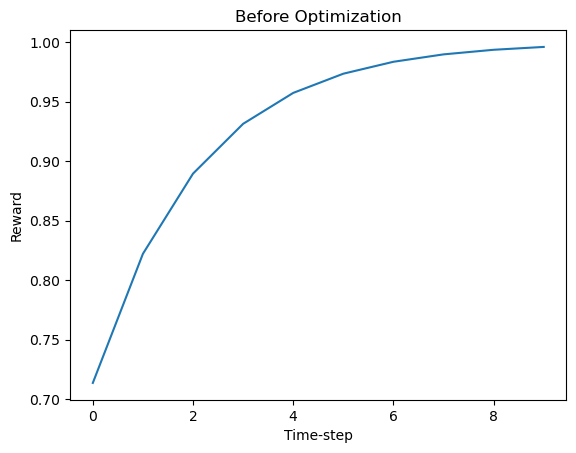

[[0.36088648 0.73992973]]
[[0.79263424 1.73992973]]


/tmp/ipykernel_50323/4270792054.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g[i], w[i] = (wi_ri - r0) / eps, wi_0
/tmp/ipykernel_50323/4270792054.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g[i], w[i] = (wi_ri - r0) / eps, wi_0


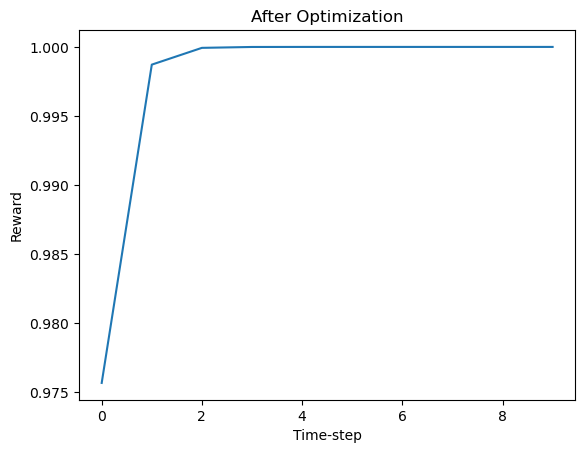

In [92]:
W = np.random.random((1,2))
s_0 = np.random.random((1,1))
_,_,R = run(s_0.copy(), W)

# show the reward traj before optimizing
plt.plot(R)
plt.title("Before Optimization")
plt.xlabel("Time-step")
plt.ylabel("Reward")
plt.show()
print(W)
S = [np.random.random((1,1)) for _ in range(10)]
a = 0.1
for e in range(100):
    g = W * 0
    for s in S:
        g += grad(W, s)
    g /= len(S)

    W += g * a
print(W)
_,_,R = run(s_0.copy(), W)
plt.title("After Optimization")
plt.xlabel("Time-step")
plt.ylabel("Reward")
plt.plot(R)
plt.show()

In [ ]:
W = np.random.random((1,2))
s_0 = np.random.random((1,1))
_,_,R = run(s_0.copy(), W)

def sim_puck

# show the reward traj before optimizing
plt.plot(R)
plt.title("Before Optimization")
plt.xlabel("Time-step")
plt.ylabel("Reward")
plt.show()
print(W)
S = [np.random.random((1,1)) for _ in range(10)]
a = 0.1
for e in range(100):
    g = W * 0
    for s in S:
        g += grad(W, s)
    g /= len(S)

    W += g * a
print(W)
_,_,R = run(s_0.copy(), W)
plt.title("After Optimization")
plt.xlabel("Time-step")
plt.ylabel("Reward")
plt.plot(R)
plt.show()